# Time series forecasting

# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ['Month', 'Price']
data = pd.read_csv('bitcoinfinal+(4).csv',names=columns, header=None)


#data = data.set_index('Month')
data


,Month,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7
5,5,262.9
6,6,284.5
7,7,231.4
8,8,236.5
9,9,316.0


## Import time series data: Airline passenger traffic

# Time series analysis

## Plot time series data

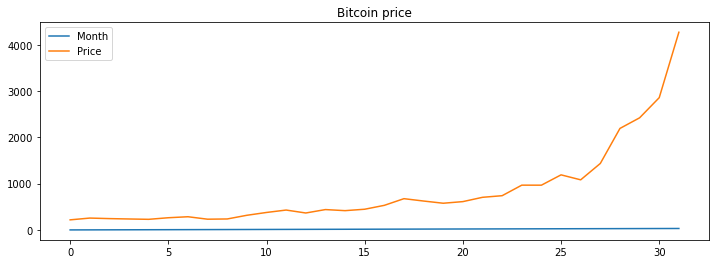

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitcoin price')
plt.show(block=False)

## Outlier detection

### Box plot and interquartile range

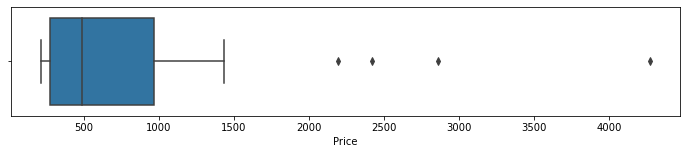

In [4]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Price'],whis=1)

### Histogram plot

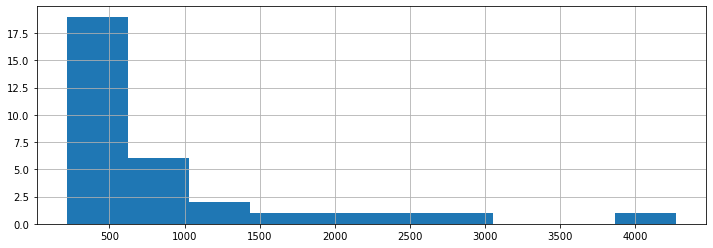

In [5]:
fig = data["Price"].hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

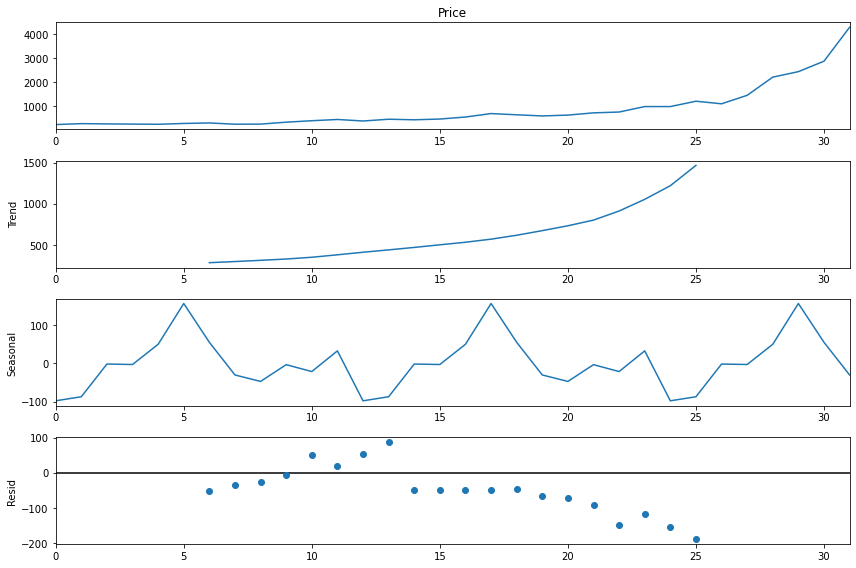

In [6]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data["Price"],freq=12, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

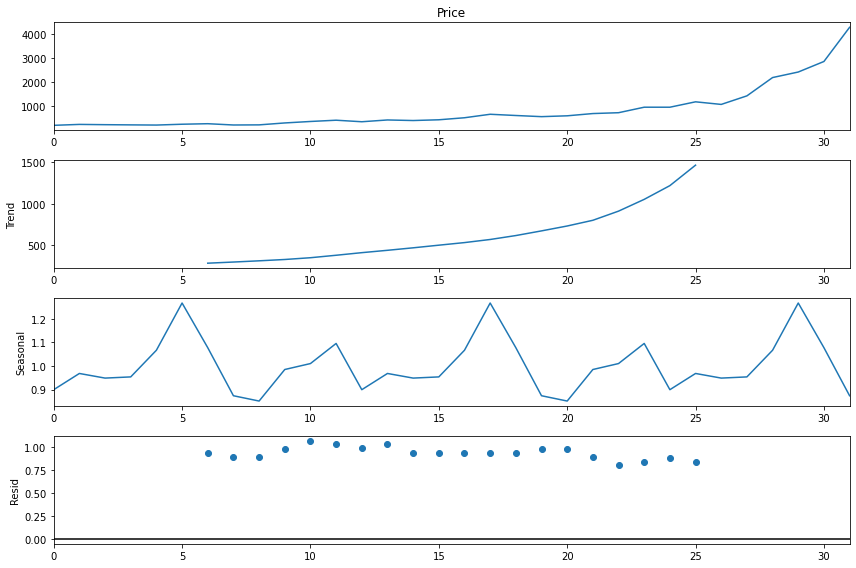

In [7]:
decomposition = sm.tsa.seasonal_decompose(data["Price"], freq=12,model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [8]:
train_len = 29
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

# Simple time series methods

## Naive method

In [9]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]
train['Price'][train_len-1]

2191.8

### Plot train, test and forecast

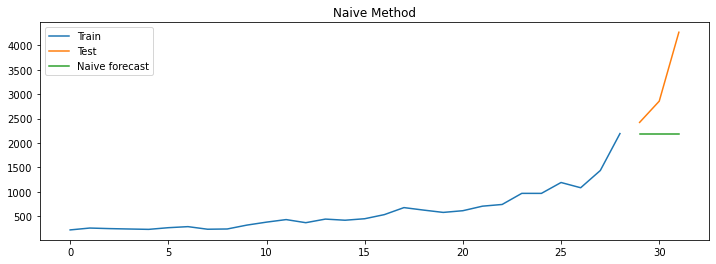

,Month,Price,naive_forecast
29,29,2420.7,2191.8
30,30,2856.0,2191.8
31,31,4268.8,2191.8


In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()
y_hat_naive

### Calculate RMSE and MAPE

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [12]:
Accuracy=100-results.MAPE
Accuracy

0    72.88
Name: MAPE, dtype: float64

## Simple average method

In [13]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()
y_hat_avg['avg_forecast']

29    595.751724
30    595.751724
31    595.751724
Name: avg_forecast, dtype: float64

### Plot train, test and forecast

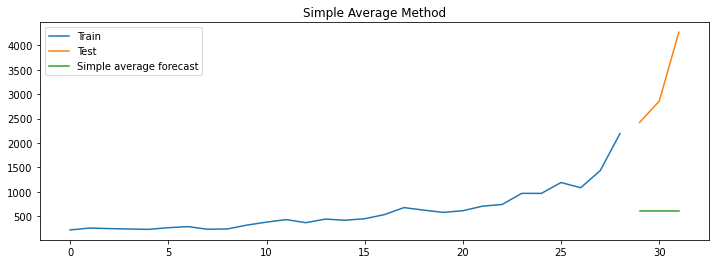

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [15]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


## Simple moving average method

In [23]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

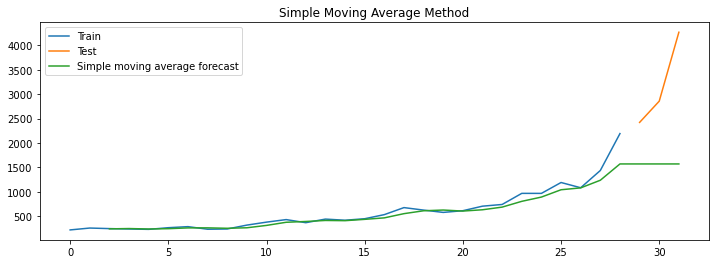

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [25]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81


# Exponential smoothing methods

## Simple exponential smoothing

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Exchange Rate TWI'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast()
y_hat_ses['ses_forecast']

KeyError: 'Exchange Rate TWI'

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']),seasonal_periods=6 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9995782612070016, 'smoothing_trend': 0.5644591035904973, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 410.805563661724, 'initial_trend': 43.75872845073153, 'initial_seasons': array([-237.29840158, -252.3806146 , -349.11549792, -330.22973508,
       -249.65892416, -165.5840893 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

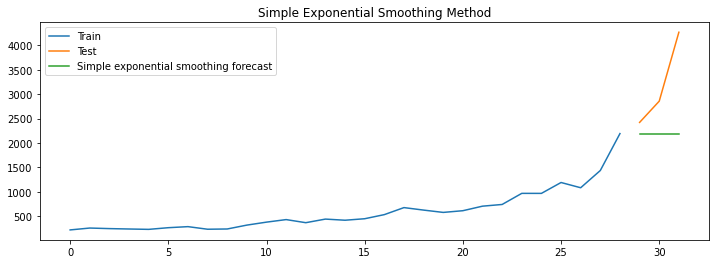

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,649.70,9.94
0,Simple exponential smoothing forecast,1268.86,27.25


## Holt's method with trend

In [53]:
# model = ExponentialSmoothing(np.asarray(train['Price']),seasonal_periods=6 ,trend='add', seasonal='add')
# model_fit = model.fit(optimized=True)
# print(model_fit.params)
# y_hat_ses = test.copy()
# y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9950625602861715, 'smoothing_trend': 0.4211195329179999, 'smoothing_seasonal': 9.75132400285262e-05, 'damping_trend': nan, 'initial_level': 559.4825908918455, 'initial_trend': 1.1393614060443729, 'initial_seasons': array([-340.0522103 , -301.79365662, -319.39222644]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

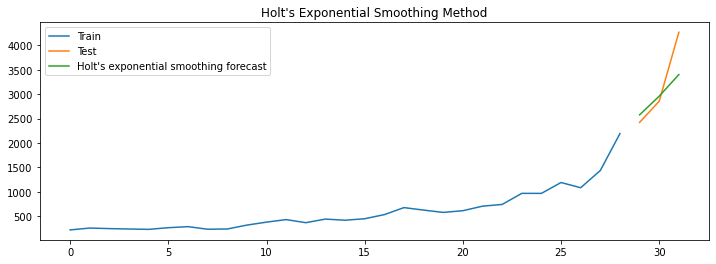

In [54]:
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [55]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,649.70,9.94
0,Simple exponential smoothing forecast,1268.86,27.25
0,Holt's exponential smoothing method,649.70,9.94
0,Holt's exponential smoothing method,512.23,10.11


## Holt Winters' additive method with trend and seasonality

In [58]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9950625602861715, 'smoothing_trend': 0.4211195329179999, 'smoothing_seasonal': 9.75132400285262e-05, 'damping_trend': nan, 'initial_level': 559.4825908918455, 'initial_trend': 1.1393614060443729, 'initial_seasons': array([-340.0522103 , -301.79365662, -319.39222644]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

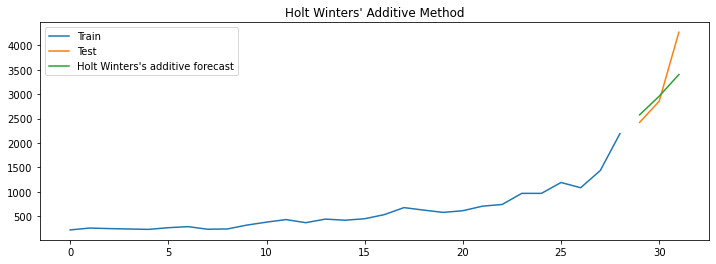

In [59]:
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [61]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,649.70,9.94
0,Simple exponential smoothing forecast,1268.86,27.25
0,Holt's exponential smoothing method,649.70,9.94
0,Holt's exponential smoothing method,512.23,10.11
0,Holt Winters' additive method,512.23,10.11


## Holt Winter's multiplicative method with trend and seasonality

In [62]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=3 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9959995506867326, 'smoothing_trend': 0.35161426970096366, 'smoothing_seasonal': 6.134075119543175e-05, 'damping_trend': nan, 'initial_level': 528.7886842895795, 'initial_trend': -13.291655344245319, 'initial_seasons': array([0.4239661 , 0.48586882, 0.43986055]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

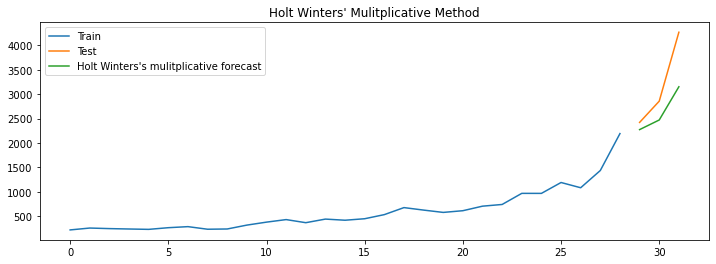

In [63]:
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [64]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwm['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,649.70,9.94
0,Simple exponential smoothing forecast,1268.86,27.25
0,Holt's exponential smoothing method,649.70,9.94
0,Holt's exponential smoothing method,512.23,10.11
0,Holt Winters' additive method,512.23,10.11
